**CATARACT DETECTION**

In [16]:
import numpy as np 
import pandas as pd
import os

In [17]:
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train/cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train/normal" in path:
            image_paths["train_normal"].append(path)
        elif "test/cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test/normal" in path:
            image_paths["test_normal"].append(path)

In [18]:
len(image_paths["train_normal"])

246

In [19]:
len(image_paths["test_normal"])

60

In [20]:
from PIL import Image
from matplotlib import pyplot as plt

**Normal sample image**

size of image : (235, 311, 3)


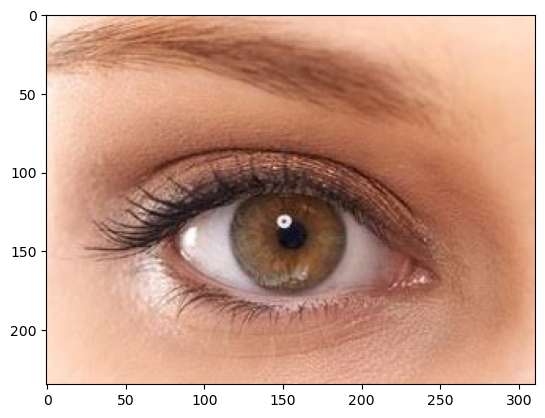

In [21]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

**Cataract sample image**

size of image : (1080, 1920, 3)


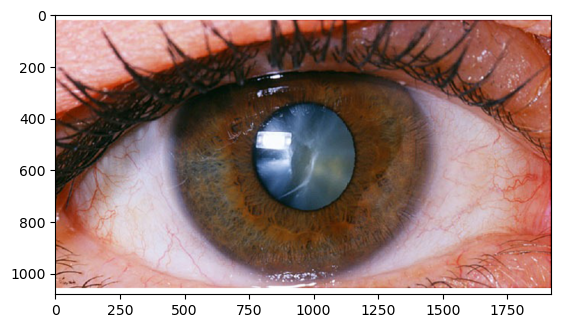

In [22]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [23]:
training_dir = "/kaggle/input/cataract-image-dataset/processed_images/train/"
image_size = (55, 94, 3)
target_size = (55, 94)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 491 images belonging to 2 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=image_size),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 53, 92, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 44, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8448)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [30]:
history = model.fit_generator(
    train_generator,
    epochs=15
)

/tmp/ipykernel_32/322193820.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
16/16 [==============================] - 17s 987ms/step - loss: 0.8239 - accuracy: 0.6049
Epoch 2/15
16/16 [==============================] - 16s 1s/step - loss: 0.6148 - accuracy: 0.7352
Epoch 3/15
16/16 [==============================] - 16s 985ms/step - loss: 0.4437 - accuracy: 0.8289
Epoch 4/15
16/16 [==============================] - 16s 1s/step - loss: 0.3377 - accuracy: 0.8513
Epoch 5/15
16/16 [==============================] - 16s 1s/step - loss: 0.2924 - accuracy: 0.8697
Epoch 6/15
16/16 [==============================] - 16s 961ms/step - loss: 0.2442 - accuracy: 0.8961
Epoch 7/15
16/16 [==============================] - 16s 1s/step - loss: 0.2460 - accuracy: 0.9043
Epoch 8/15
16/16 [==============================] - 16s 1s/step - loss: 0.2062 - accuracy: 0.9267
Epoch 9/15
16/16 [==============================] - 16s 1s/step - loss: 0.1788 - accuracy: 0.9389
Epoch 10/15
16/16 [==============================] - 16s 1s/step - loss: 0.1841 - accuracy: 0.9308
Epoch 11/1

In [31]:
model.save('first_model.h5')

import shutil
shutil.move('first_model.h5', '/kaggle/working/first_model.h5')

'/kaggle/working/first_model.h5'

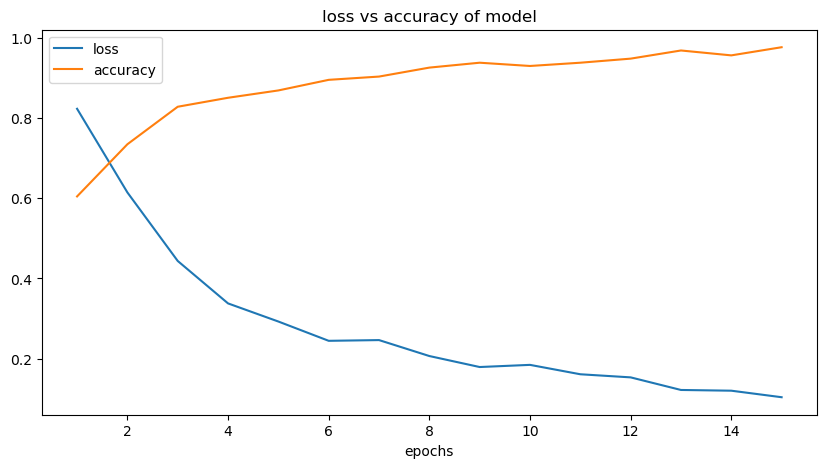

In [32]:
epochs = range(1, 16)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [33]:
import tensorflow as tf

In [34]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [35]:
from keras.preprocessing import image

In [36]:
label = train_generator.class_indices
print(label)

{'cataract': 0, 'normal': 1}


**Sample prediction**

1.Cataract

1/1 [==============================] - 0s 128ms/step
actual class : cataract
predicted class : cataract


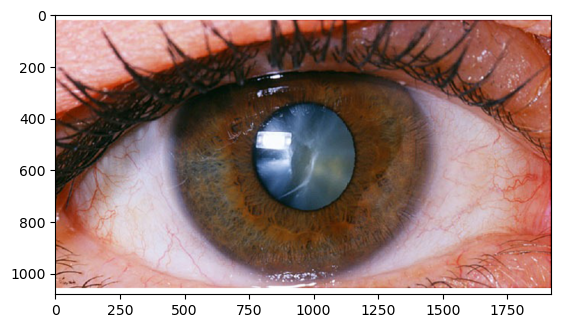

In [37]:
path = image_paths["test_cataract"][0]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

**1. Normal**

1/1 [==============================] - 0s 22ms/step
actual class : normal
predicted class : normal


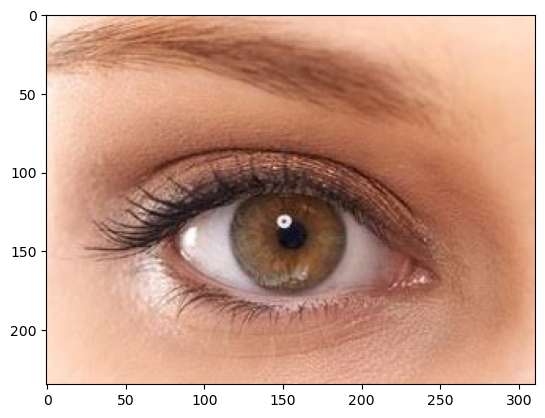

In [38]:
path = image_paths["test_normal"][1]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

In [39]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'


In [40]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)
        
        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)
    
    return normal_pred, cataract_pred


In [41]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

1/1 [==============================] - 0s 22ms/step


**Table of predicted results**

In [42]:
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

In [43]:
pred_df.tail(20)

,relative_path,actual_class,predicted_class
100,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
101,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
102,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
103,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
104,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
105,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
106,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
107,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
108,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract
109,/kaggle/input/cataract-image-dataset/processed...,cataract,cataract


In [44]:
pred_df.head(20)

,relative_path,actual_class,predicted_class
0,/kaggle/input/cataract-image-dataset/processed...,normal,normal
1,/kaggle/input/cataract-image-dataset/processed...,normal,normal
2,/kaggle/input/cataract-image-dataset/processed...,normal,normal
3,/kaggle/input/cataract-image-dataset/processed...,normal,normal
4,/kaggle/input/cataract-image-dataset/processed...,normal,normal
5,/kaggle/input/cataract-image-dataset/processed...,normal,normal
6,/kaggle/input/cataract-image-dataset/processed...,normal,cataract
7,/kaggle/input/cataract-image-dataset/processed...,normal,normal
8,/kaggle/input/cataract-image-dataset/processed...,normal,normal
9,/kaggle/input/cataract-image-dataset/processed...,normal,normal


**Evalution**

In [45]:
tp = tn = fp = fn = 0
for actual, predicted in zip(list(pred_df['actual_class']), list(pred_df['predicted_class'])):
    if actual == 'normal' and predicted == 'normal':
        tp = tp + 1
    elif actual == 'cataract' and predicted == 'cataract':
        tn = tn + 1
    elif actual == 'normal' and predicted == 'cataract':
        fp = fp + 1
    elif actual == 'cataract' and predicted == 'normal':
        fn = fn + 1

In [46]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

In [47]:
evaluation_summary = pd.DataFrame()
evaluation_summary["accuracy"] = [accuracy]
evaluation_summary["precision"] = [precision]
evaluation_summary["recall"] = [recall]
evaluation_summary["f1"] = [f1]

In [48]:
evaluation_summary

,accuracy,precision,recall,f1
0,0.916667,0.883333,0.946429,0.913793


In [49]:
model.save('second_model.h5')

import shutil
shutil.move('second_model.h5', '/kaggle/working/second_model.h5')

'/kaggle/working/second_model.h5'

In [50]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

In [51]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


**VGG MODEL**

In [54]:
input_shape = (224, 224, 3)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
___________________________________

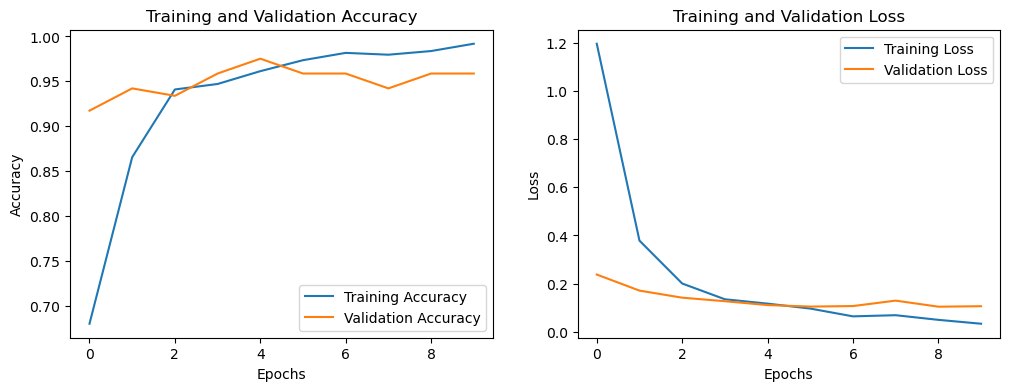

In [55]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [56]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 36s 9s/step - loss: 0.1060 - accuracy: 0.9587
Test Accuracy: 95.87%


In [57]:
from tensorflow.keras.applications import InceptionV3
input_shape = (299, 299, 3) 

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,065,185
Trainable params: 262,401
Non-

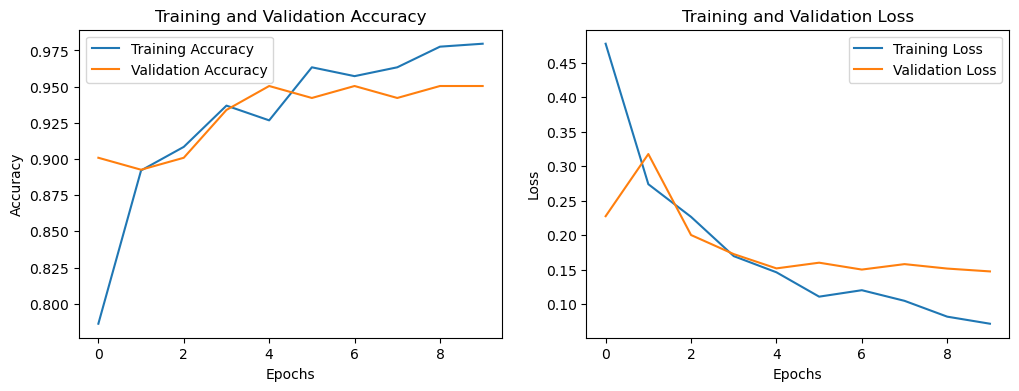

In [58]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [59]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 9s 2s/step - loss: 0.1473 - accuracy: 0.9504
Test Accuracy: 95.04%


In [60]:
model.save('piceye_model.h5')

import shutil
shutil.move('piceye_model.h5', '/kaggle/working/piceye_model.h5')

'/kaggle/working/piceye_model.h5'